In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import cv2
from sklearn.metrics import classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception


In [2]:
 input_shape = (256, 256, 3)   
num_classes = 6   
batch_size = 32
epochs = 100

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    'Train_Currency',
    target_size=(256, 256),   
    batch_size=32,   
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Test_Currency',
    target_size=(256, 256),   
    batch_size=32,   
    class_mode='categorical'
)

Found 2571 images belonging to 6 classes.
Found 1019 images belonging to 6 classes.


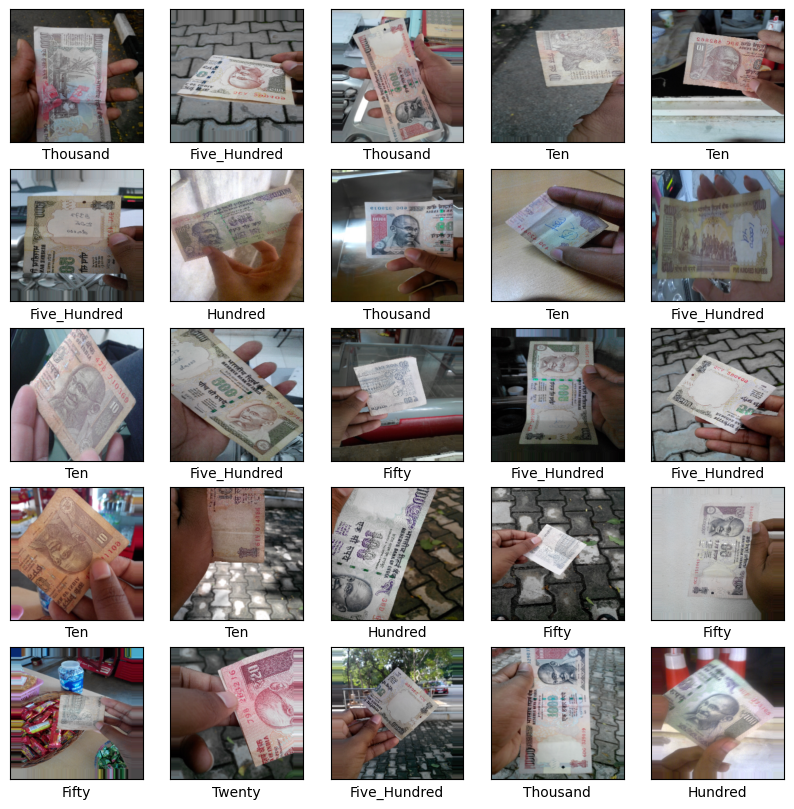

In [5]:
 
images, labels = train_generator.next()
class_names = ['Fifty', 'Five_Hundred', 'Hundred', 'Ten', 'Thousand',
               'Twenty' ]
 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(class_names[labels[i].argmax()])   
plt.show()

## CNN Model

In [6]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn_model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn_model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn_model.add(Flatten())

# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.1))
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(Dense(6, activation='softmax'))

In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       7

In [8]:
cnn_model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [9]:
cnn_history=cnn_model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=test_generator)


Epoch 1/100
81/81 [==============================] - 92s 1s/step - loss: 7.0641 - accuracy: 0.2342 - val_loss: 5.9226 - val_accuracy: 0.1825
Epoch 2/100
81/81 [==============================] - 78s 962ms/step - loss: 2.4545 - accuracy: 0.2310 - val_loss: 3.2244 - val_accuracy: 0.1551
Epoch 3/100
81/81 [==============================] - 61s 754ms/step - loss: 1.7910 - accuracy: 0.2322 - val_loss: 1.9814 - val_accuracy: 0.1443
Epoch 4/100
81/81 [==============================] - 61s 756ms/step - loss: 1.6608 - accuracy: 0.3310 - val_loss: 3.9850 - val_accuracy: 0.1816
Epoch 5/100
81/81 [==============================] - 61s 756ms/step - loss: 1.5517 - accuracy: 0.3551 - val_loss: 1.8075 - val_accuracy: 0.2856
Epoch 6/100
81/81 [==============================] - 61s 755ms/step - loss: 1.5452 - accuracy: 0.3559 - val_loss: 1.6955 - val_accuracy: 0.2483
Epoch 7/100
81/81 [==============================] - 61s 758ms/step - loss: 1.5345 - accuracy: 0.3625 - val_loss: 1.5077 - val_accuracy: 0.

In [53]:
train_accuracy_cnn =cnn_history.history['accuracy'][-1]
test_accuracy_cnn =cnn_history.history['val_accuracy'][-1]

average_train_accuracy_cnn = np.mean(train_accuracy_cnn)
average_test_accuracy_cnn = np.mean(test_accuracy_cnn)

print("Average Training Accuracy CNN:", average_train_accuracy_cnn)
print("Average Testing Accuracy CNN:", average_test_accuracy_cnn)

Average Training Accuracy CNN: 0.9723842740058899
Average Testing Accuracy CNN: 0.5161923170089722


In [10]:
print("Train accuracy CNN:", cnn_history.history['accuracy'][-1])
print("Test accuracy CNN:", cnn_history.history['val_accuracy'][-1])

Train accuracy CNN: 0.9723842740058899
Test accuracy CNN: 0.5161923170089722


In [11]:
cnn_model.save("model_cnn.h5") 

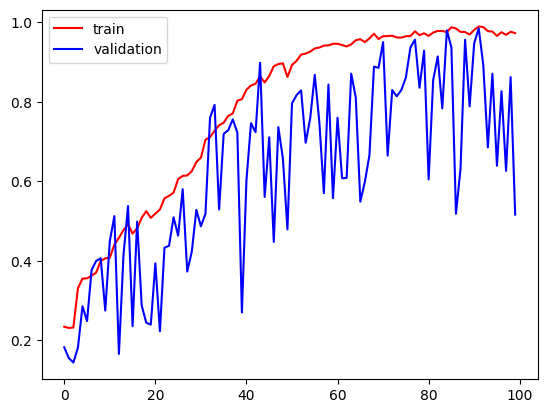

In [12]:
plt.plot(cnn_history.history['accuracy'],color='red',label='train')
plt.plot(cnn_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

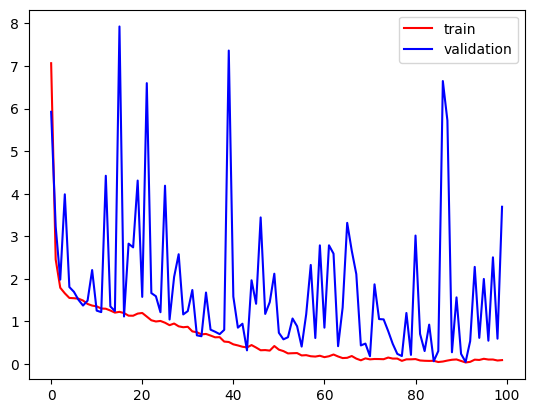

In [13]:
plt.plot(cnn_history.history['loss'],color='red',label='train')
plt.plot(cnn_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## ResNet Model

In [19]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))  # Adjust image size as needed


In [20]:
for layer in base_model_resnet.layers[:-5]:  # Freeze last 5 blocks
    layer.trainable = False

In [21]:
x = base_model_resnet.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)   
x = BatchNormalization()(x)   
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)   
x = Dropout(0.2)(x)
predictions = Dense(6, activation='softmax')(x)

In [22]:
resnet_model = Model(inputs=base_model_resnet.input, outputs=predictions)

In [23]:
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [24]:
resnet_model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [25]:
resnet_history = resnet_model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=100,   
                  validation_data=test_generator)

Epoch 1/100
81/81 [==============================] - 70s 808ms/step - loss: 1.9012 - accuracy: 0.2081 - val_loss: 13.2323 - val_accuracy: 0.1816
Epoch 2/100
81/81 [==============================] - 66s 811ms/step - loss: 1.7531 - accuracy: 0.2711 - val_loss: 7.9394 - val_accuracy: 0.1619
Epoch 3/100
81/81 [==============================] - 66s 816ms/step - loss: 1.6867 - accuracy: 0.3057 - val_loss: 5.0465 - val_accuracy: 0.1943
Epoch 4/100
81/81 [==============================] - 66s 816ms/step - loss: 1.6371 - accuracy: 0.3279 - val_loss: 3.7272 - val_accuracy: 0.2306
Epoch 5/100
81/81 [==============================] - 67s 824ms/step - loss: 1.6219 - accuracy: 0.3407 - val_loss: 3.9962 - val_accuracy: 0.1708
Epoch 6/100
81/81 [==============================] - 66s 817ms/step - loss: 1.5863 - accuracy: 0.3532 - val_loss: 2.4523 - val_accuracy: 0.1943
Epoch 7/100
81/81 [==============================] - 66s 820ms/step - loss: 1.5421 - accuracy: 0.3718 - val_loss: 2.1699 - val_accuracy

In [54]:
train_accuracy_resnet =resnet_history.history['accuracy'][-1]
test_accuracy_resnet =resnet_history.history['val_accuracy'][-1]

average_train_accuracy_resnet = np.mean(train_accuracy_resnet)
average_test_accuracy_resnet = np.mean(test_accuracy_resnet)

print("Average Training Accuracy ResNet:", average_train_accuracy_resnet)
print("Average Testing Accuracy ResNet:", average_test_accuracy_resnet)

Average Training Accuracy ResNet: 0.7709062695503235
Average Testing Accuracy ResNet: 0.5250245332717896


In [26]:
print("Train accuracy ResNet:", resnet_history.history['accuracy'][-1])
print("Test accuracy ResNet:", resnet_history.history['val_accuracy'][-1])

Train accuracy ResNet: 0.7709062695503235
Test accuracy ResNet: 0.5250245332717896


In [27]:
resnet_model.save("model_resnet.h5")

D:\anaconda3\envs\test_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


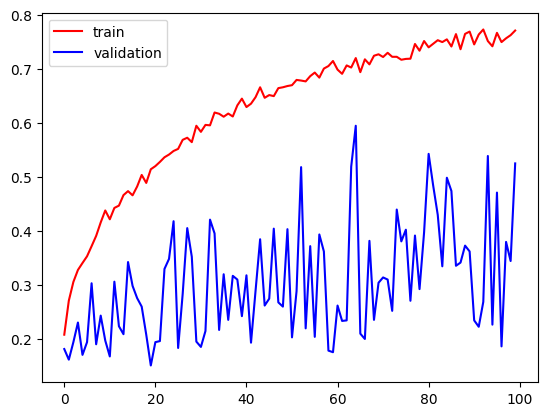

In [28]:
plt.plot(resnet_history.history['accuracy'],color='red',label='train')
plt.plot(resnet_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

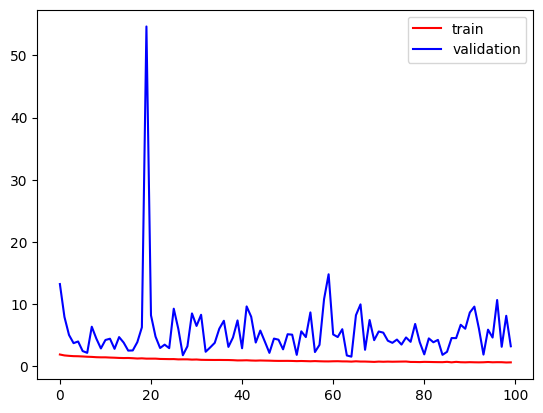

In [55]:
plt.plot(resnet_history.history['loss'],color='red',label='train')
plt.plot(resnet_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## VGG Model

In [30]:
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(256,256, 3))

In [31]:
for layer in base_model_vgg.layers[:-5]:
    layer.trainable = False


In [32]:
x = base_model_vgg.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)   
x = BatchNormalization()(x)   
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)   
x = Dropout(0.2)(x)
predictions = Dense(6, activation='softmax')(x)

In [33]:
vgg_model = Model(inputs=base_model_vgg.input, outputs=predictions)

In [34]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [35]:
vgg_model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [36]:
vgg_history = vgg_model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=100,   
                  validation_data=test_generator)

Epoch 1/100
81/81 [==============================] - 87s 972ms/step - loss: 1.7460 - accuracy: 0.3135 - val_loss: 11.9567 - val_accuracy: 0.1668
Epoch 2/100
81/81 [==============================] - 69s 854ms/step - loss: 1.0236 - accuracy: 0.6002 - val_loss: 6.1072 - val_accuracy: 0.2640
Epoch 3/100
81/81 [==============================] - 71s 871ms/step - loss: 0.6973 - accuracy: 0.7382 - val_loss: 0.5889 - val_accuracy: 0.7763
Epoch 4/100
81/81 [==============================] - 69s 856ms/step - loss: 0.4596 - accuracy: 0.8207 - val_loss: 1.4931 - val_accuracy: 0.6271
Epoch 5/100
81/81 [==============================] - 70s 864ms/step - loss: 0.4028 - accuracy: 0.8491 - val_loss: 7.1971 - val_accuracy: 0.3170
Epoch 6/100
81/81 [==============================] - 67s 828ms/step - loss: 0.3745 - accuracy: 0.8654 - val_loss: 1.0017 - val_accuracy: 0.7007
Epoch 7/100
81/81 [==============================] - 68s 840ms/step - loss: 0.2995 - accuracy: 0.8934 - val_loss: 1.2556 - val_accuracy

In [56]:
train_accuracy_vgg =vgg_history.history['accuracy'][-1]
test_accuracy_vgg =vgg_history.history['val_accuracy'][-1]

average_train_accuracy_vgg = np.mean(train_accuracy_vgg)
average_test_accuracy_vgg = np.mean(test_accuracy_vgg)

print("Average Training Accuracy VGG:", average_train_accuracy_vgg)
print("Average Testing Accuracy VGG:", average_test_accuracy_vgg)

Average Training Accuracy VGG: 0.9914430379867554
Average Testing Accuracy VGG: 0.9352306127548218


In [37]:
# Print train and test accuracy
print("Train accuracy VGG:", vgg_history.history['accuracy'][-1])
print("Test accuracy VGG:", vgg_history.history['val_accuracy'][-1])

Train accuracy VGG: 0.9914430379867554
Test accuracy VGG: 0.9352306127548218


In [38]:
vgg_model.save("model_vgg16.h5")

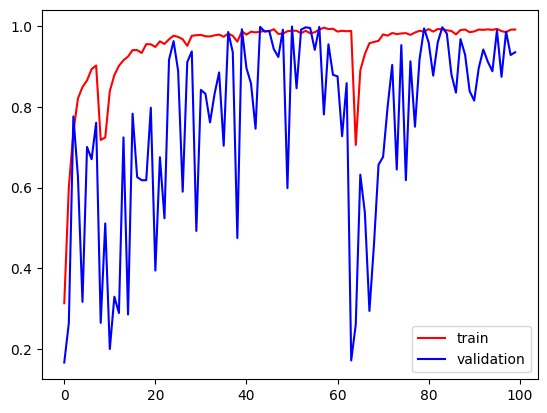

In [39]:
plt.plot(vgg_history.history['accuracy'],color='red',label='train')
plt.plot(vgg_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

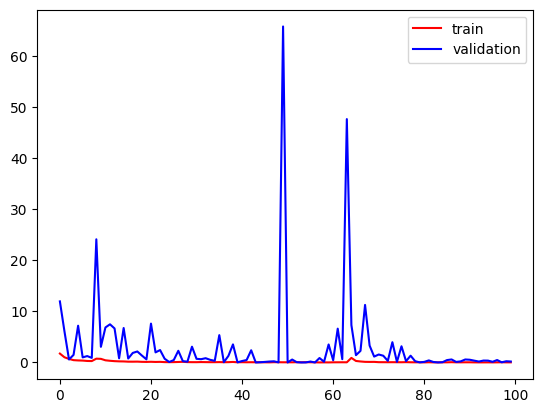

In [57]:
plt.plot(vgg_history.history['loss'],color='red',label='train')
plt.plot(vgg_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## XCeption Model

In [41]:
xcep_base_model = Xception(weights='imagenet', include_top=False, input_shape=(256,256, 3))

In [42]:
for layer in xcep_base_model.layers[:-5]:
    layer.trainable = False

In [43]:
x = xcep_base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)   
x = BatchNormalization()(x)   
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)   
x = Dropout(0.2)(x)
predictions = Dense(6, activation='softmax')(x)

In [44]:
xcep_model = Model(inputs=xcep_base_model.input, outputs=predictions)

In [45]:
xcep_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [46]:
xcep_model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [47]:
xcep_history = xcep_model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=100,   
                  validation_data=test_generator)

Epoch 1/100
81/81 [==============================] - 82s 925ms/step - loss: 1.1546 - accuracy: 0.5912 - val_loss: 1.4471 - val_accuracy: 0.6605
Epoch 2/100
81/81 [==============================] - 70s 860ms/step - loss: 0.4786 - accuracy: 0.8281 - val_loss: 0.3584 - val_accuracy: 0.8891
Epoch 3/100
81/81 [==============================] - 70s 863ms/step - loss: 0.3208 - accuracy: 0.8829 - val_loss: 0.3057 - val_accuracy: 0.9058
Epoch 4/100
81/81 [==============================] - 73s 897ms/step - loss: 0.2433 - accuracy: 0.9109 - val_loss: 0.2523 - val_accuracy: 0.9264
Epoch 5/100
81/81 [==============================] - 78s 964ms/step - loss: 0.2309 - accuracy: 0.9242 - val_loss: 0.1396 - val_accuracy: 0.9500
Epoch 6/100
81/81 [==============================] - 70s 858ms/step - loss: 0.1644 - accuracy: 0.9452 - val_loss: 0.0747 - val_accuracy: 0.9755
Epoch 7/100
81/81 [==============================] - 69s 854ms/step - loss: 0.1585 - accuracy: 0.9487 - val_loss: 0.1173 - val_accuracy:

In [58]:
train_accuracy_xcep =xcep_history.history['accuracy'][-1]
test_accuracy_xcep =xcep_history.history['val_accuracy'][-1]

average_train_accuracy_xcep = np.mean(train_accuracy_xcep)
average_test_accuracy_xcep = np.mean(test_accuracy_xcep)

print("Average Training Accuracy XCeption:", average_train_accuracy_xcep)
print("Average Testing Accuracy XCeption:", average_test_accuracy_xcep)

Average Training Accuracy XCeption: 0.9902761578559875
Average Testing Accuracy XCeption: 0.9960745573043823


In [48]:
print("Train accuracy XCeption:", xcep_history.history['accuracy'][-1])
print("Test accuracy XCeption:", xcep_history.history['val_accuracy'][-1])

Train accuracy XCeption: 0.9902761578559875
Test accuracy XCeption: 0.9960745573043823


In [49]:
xcep_model.save("model_xception.h5")

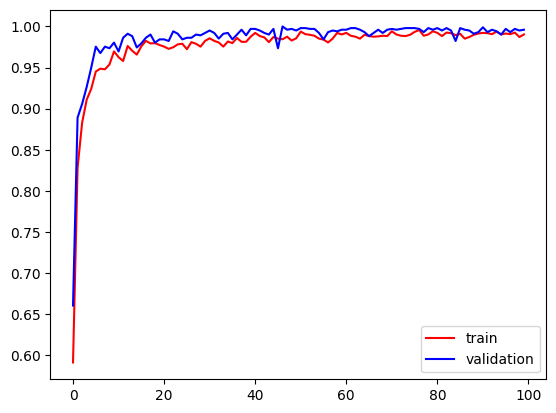

In [50]:
plt.plot(xcep_history.history['accuracy'],color='red',label='train')
plt.plot(xcep_history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

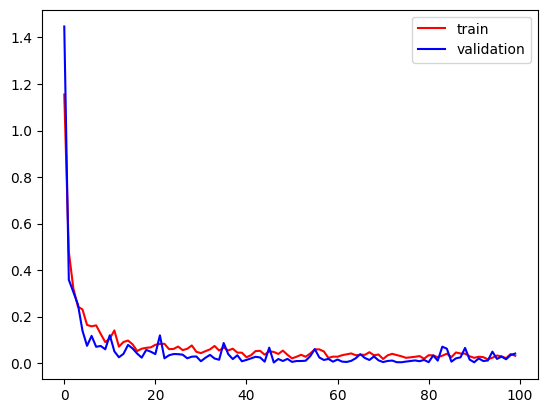

In [52]:
plt.plot(xcep_history.history['loss'],color='red',label='train')
plt.plot(xcep_history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [93]:
img = cv2.imread('Hundred\10.jpg')
img = cv2.resize(img, (256, 256))   
img = img / 255.0   
img = np.expand_dims(img, axis=0)   

In [94]:
prediction_cnn = cnn_model.predict(img)   
prediction_resnet = resnet_model.predict(img)
prediction_vgg = vgg_model.predict(img)
prediction_xcep = xcep_model.predict(img)

In [95]:
class_names = ['Ten', 'Twenty', 'Fifty', 'Hundred', 'Five_Hundred', 'Thousand']   

predicted_class_index_cnn = np.argmax(prediction_cnn)
predicted_class_name_cnn = class_names[predicted_class_index_cnn]

predicted_class_index_resnet = np.argmax(prediction_resnet)
predicted_class_name_resnet = class_names[predicted_class_index_resnet]

predicted_class_index_vgg = np.argmax(prediction_vgg)
predicted_class_name_vgg = class_names[predicted_class_index_vgg]

predicted_class_index_xcep = np.argmax(prediction_xcep)
predicted_class_name_xcep = class_names[predicted_class_index_xcep]

In [96]:
print(f"Predicted class CNN: {predicted_class_index_cnn}")   
print(f"Predicted class CNN: {predicted_class_name_cnn}")

print(f"Predicted class ResNet: {predicted_class_index_resnet}")   
print(f"Predicted class ResNet: {predicted_class_name_resnet}")

print(f"Predicted class VGG: {predicted_class_index_vgg}")   
print(f"Predicted class VGG: {predicted_class_name_vgg}")

print(f"Predicted class XCeption: {predicted_class_index_xcep}")   
print(f"Predicted class XCeption: {predicted_class_name_xcep}")

Predicted class CNN: 3
Predicted class CNN: Hundred
Predicted class ResNet: 3
Predicted class ResNet: Hundred
Predicted class VGG: 3
Predicted class VGG: Hundred
Predicted class XCeption: 3
Predicted class XCeption: Hundred
